## 第7章: 単語ベクトル   
単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して，以下の処理を行うプログラムを作成せよ．

In [1]:
path="./Section_6/NewsAggregatorDataset/newsCorpora.csv"

60. 単語ベクトルの読み込みと表示  
Google Newsデータセット（約1,000億単語）での学習済み単語ベクトル（300万単語・フレーズ，300次元）をダウンロードし，”United States”の単語ベクトルを表示せよ．ただし，”United States”は内部的には”United_States”と表現されていることに注意せよ．

In [2]:
# 学習済み単語ベクトル==word2vecで得られる≠Bag of Words

In [3]:
import gensim

In [4]:
model = gensim.models.KeyedVectors.load_word2vec_format('./Section_7/GoogleNews-vectors-negative300.bin', binary=True)

In [5]:
type(model)

gensim.models.keyedvectors.Word2VecKeyedVectors

In [6]:
model['United_States'].shape

(300,)

61. 単語の類似度  
“United States”と”U.S.”のコサイン類似度を計算せよ．

In [7]:
model.similarity('United_States','U.S.')

0.73107743

62. 類似度の高い単語10件  
“United States”とコサイン類似度が高い10語と，その類似度を出力せよ．

In [8]:
model.most_similar('United_States',topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370391845703),
 ('United_Sates', 0.74007248878479),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.6019070148468018)]

In [9]:
# タイポやんけ

63. 加法構成性によるアナロジー  
“Spain”の単語ベクトルから”Madrid”のベクトルを引き，”Athens”のベクトルを足したベクトルを計算し，そのベクトルと類似度の高い10語とその類似度を出力せよ．
positive,negativeを指定することで加算や減算が可能です。

In [10]:
model.most_similar(positive=['Spain','Athens'], negative=['Madrid'],topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.5606849193572998),
 ('Ioannis_Drymonakos', 0.555290937423706),
 ('Greeks', 0.5450686812400818),
 ('Ioannis_Christou', 0.5400862693786621),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759141921997),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]

In [11]:
# Greece:ギリシャ
# アリスティディス・グリゴリアディス水泳選手
# イオニアス・ドリモナコス 水泳選手
# ギリシャ語
# 人名
# 人名
# Heraklio:イラクリオン　ギリシャ クレタ島の都市
# リトアニア
# Heraklioの別名？

64. アナロジーデータでの実験  
単語アナロジーの評価データをダウンロードし，vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し，そのベクトルと類似度が最も高い単語と，その類似度を求めよ．求めた単語と類似度は，各事例の末尾に追記せよ．

In [12]:
with open('./Section_7/questions-words.txt') as f:
    questions = f.readlines()
with open('./Section_7/64.txt','w') as f:
    for i,question in enumerate(questions[:10]):
        words = question.split()
        if len(words)==4:
            ans = model.most_similar(positive=[words[1],words[2]], negative=[words[0]],topn=1)[0]
            words += [ans[0], str(ans[1])]
            output = ' '.join(words)+'\n'
            print(words)
        else:
            output = question
        f.write(output)
#         if (i%100==0):
#             print (i)

['Athens', 'Greece', 'Baghdad', 'Iraq', 'Iraqi', '0.6351871490478516']
['Athens', 'Greece', 'Bangkok', 'Thailand', 'Thailand', '0.7137669324874878']
['Athens', 'Greece', 'Beijing', 'China', 'China', '0.7235777974128723']
['Athens', 'Greece', 'Berlin', 'Germany', 'Germany', '0.6734622716903687']
['Athens', 'Greece', 'Bern', 'Switzerland', 'Switzerland', '0.4919748306274414']
['Athens', 'Greece', 'Cairo', 'Egypt', 'Egypt', '0.7527809739112854']
['Athens', 'Greece', 'Canberra', 'Australia', 'Australia', '0.583732545375824']
['Athens', 'Greece', 'Hanoi', 'Vietnam', 'Viet_Nam', '0.6276341676712036']
['Athens', 'Greece', 'Havana', 'Cuba', 'Cuba', '0.6460991501808167']


65. アナロジータスクでの正解率  
64の実行結果を用い，意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ．

In [13]:
cnt = 0
ok = 0
with open('./Section_7/64.txt','r') as f:
    questions = f.readlines()
for question in questions[:10]:
    words = question.split()
    if len(words)==6:
        cnt += 1
        if (words[3]==words[4]):
            ok +=1
print (ok/cnt)

0.7777777777777778


In [14]:
# 意味的アナロジー構造的アナロジーとは

66. WordSimilarity-353での評価  
The WordSimilarity-353 Test Collectionの評価データをダウンロードし，単語ベクトルにより計算される類似度のランキングと，人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ．

In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('./Section_7/wordsim353/combined.csv')
sim = []
for i in range(len(df)):
    line = df.iloc[i]
    sim.append(model.similarity(line['Word 1'],line['Word 2']))
df['w2v'] = sim 
df[['Human (mean)', 'w2v']].corr(method='spearman')

,Human (mean),w2v
Human (mean),1.000000,0.700017
w2v,0.700017,1.000000


67. k-meansクラスタリング  
国名に関する単語ベクトルを抽出し，k-meansクラスタリングをクラスタ数k=5として実行せよ．

In [17]:
from sklearn.cluster import KMeans

In [18]:
with open('./Section_7/country.txt','r') as f:
    lines = f.readlines()
countries = []
for line in lines:
    country = line.split('　')[-1].replace('\n','')
    countries.append(country)
dic = {'United States of America':'United_States', 'Russian Federation':'Russia'}
ng = 0
vec = []
target_countries = []
for c in countries:
    for k,v in dic.items():
        c = c.replace(k,v)
    c = c.replace(' ','_').replace('-','_').replace('_and_','_')
    try:
        
        vec.append(model[c])
        target_countries.append(c)
    except:
        ng += 1
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(vec)
# for c,l in zip(target_countries, kmeans.labels_):
#     print (c,l)
print("NG:{}".format(ng))

NG:18


68. Ward法によるクラスタリング  
国名に関する単語ベクトルに対し，Ward法による階層型クラスタリングを実行せよ．さらに，クラスタリング結果をデンドログラムとして可視化せよ．

In [19]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

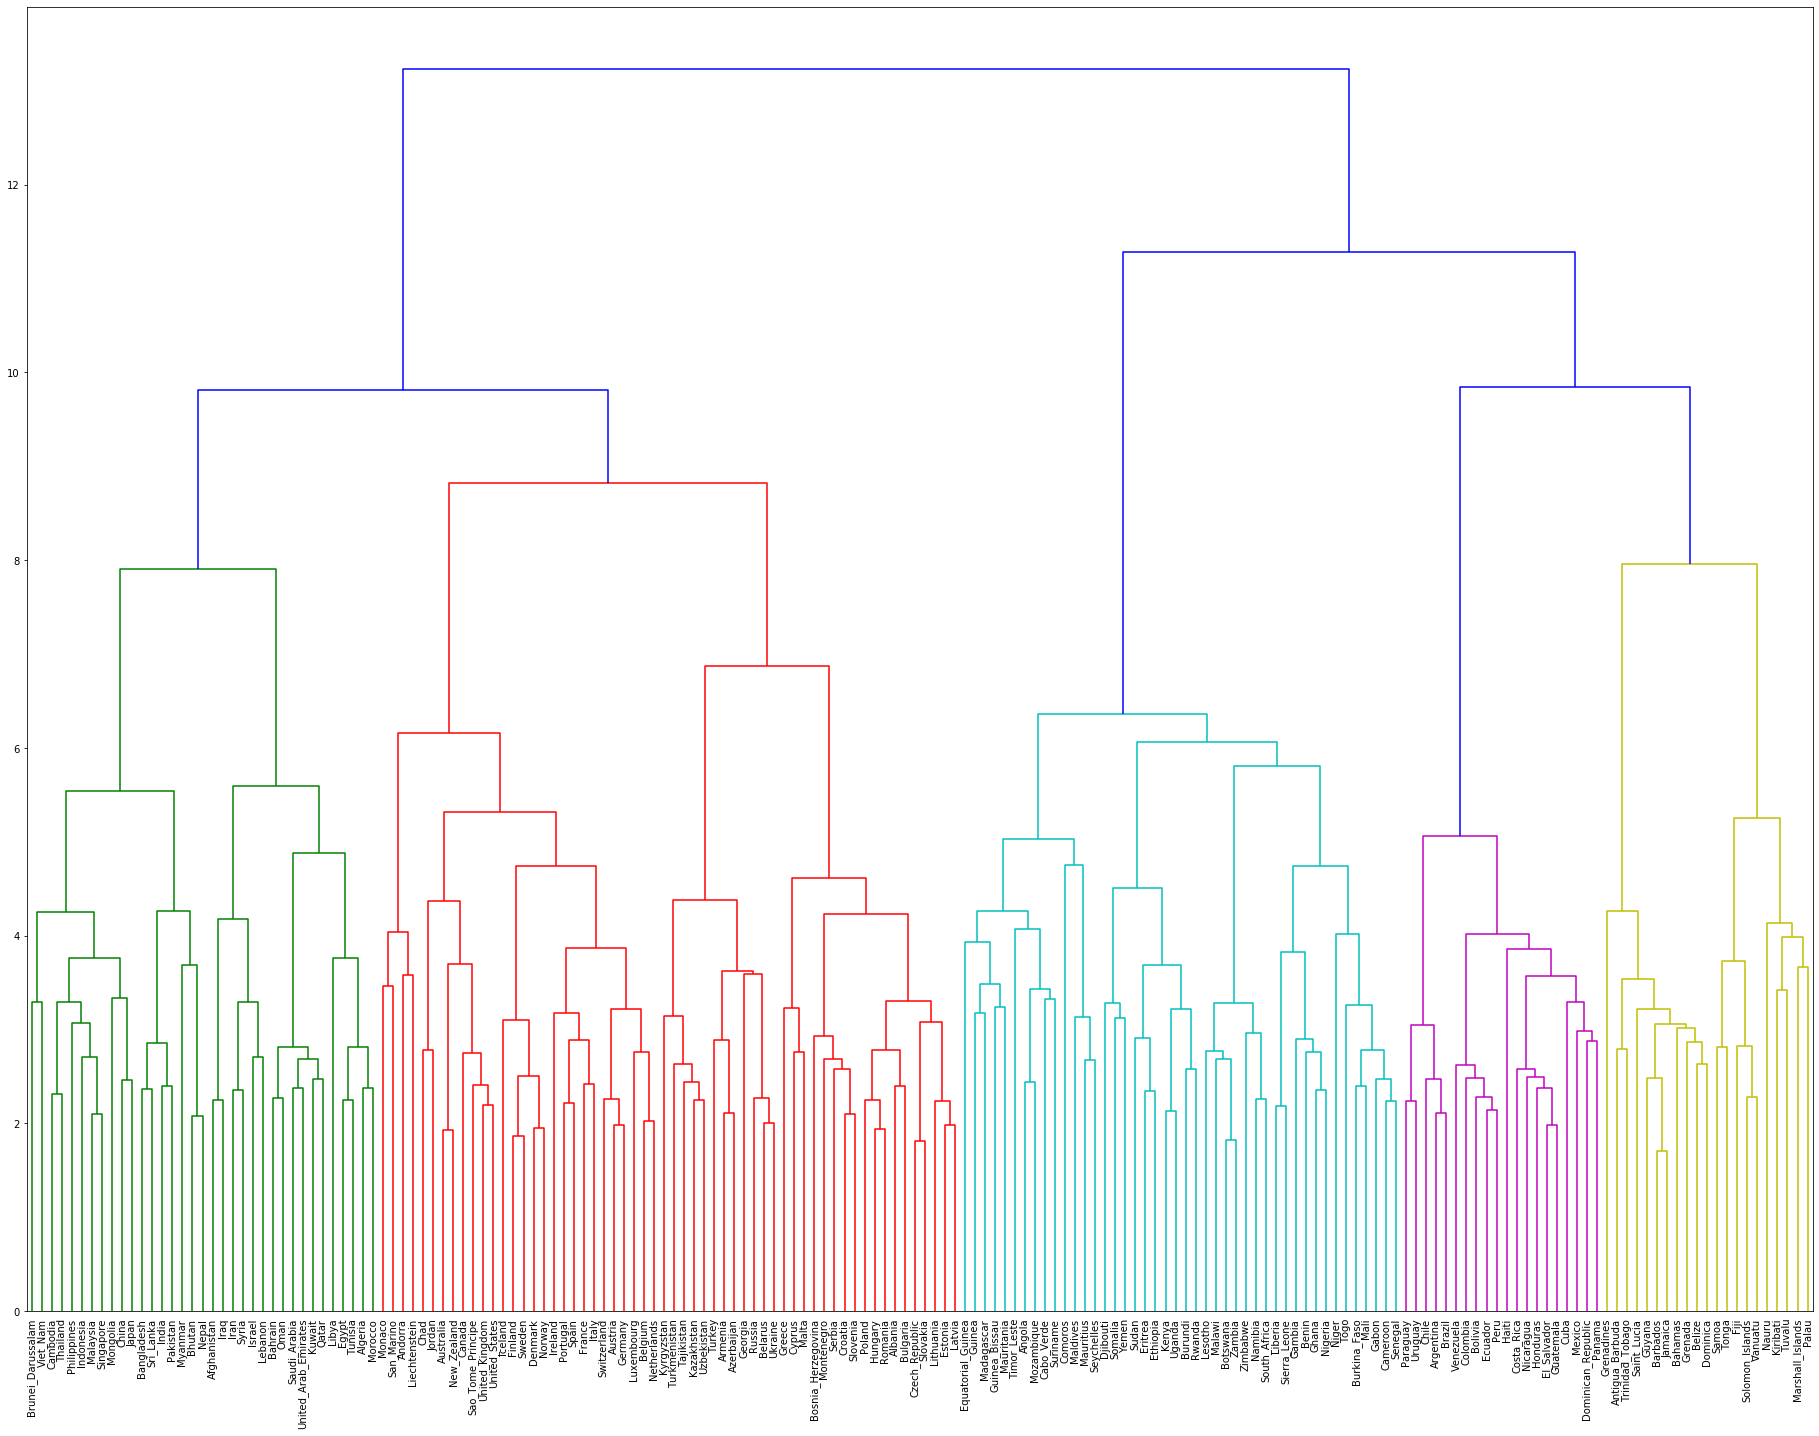

In [20]:
plt.figure(figsize=(32.0, 24.0))
link = linkage(vec, method='ward')
dendrogram(link, labels=target_countries,leaf_rotation=90,leaf_font_size=10)
plt.show()

69. t-SNEによる可視化  
国名に関する単語ベクトルのベクトル空間をt-SNEで可視化せよ．

In [21]:
from sklearn.manifold import TSNE

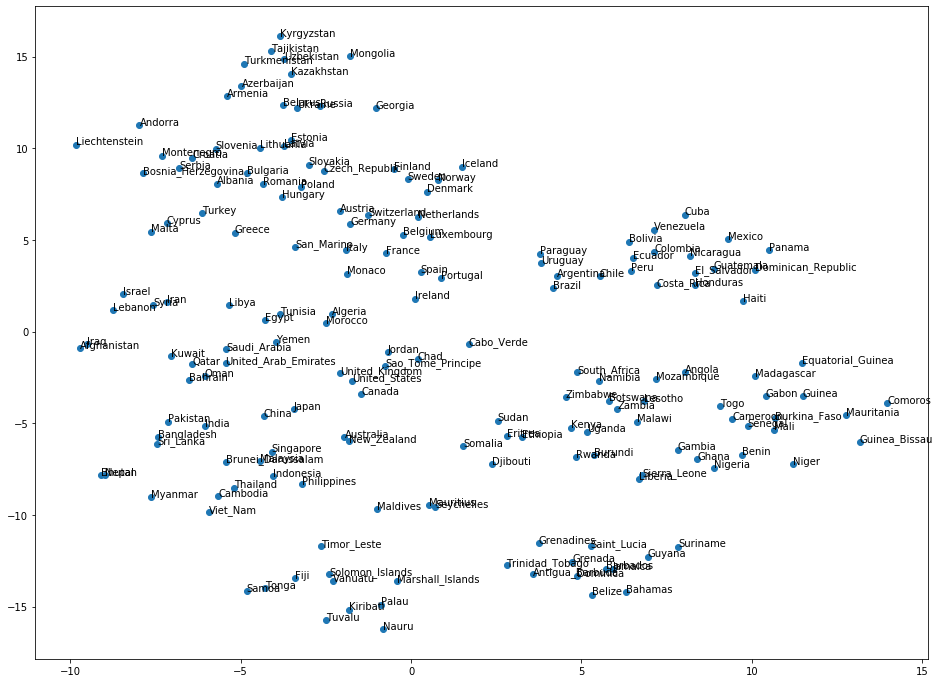

In [22]:
vec_embedded = TSNE(n_components=2).fit_transform(vec)
vec_embedded_t = list(zip(*vec_embedded)) # 転置
fig, ax = plt.subplots(figsize=(16, 12))
plt.scatter(*vec_embedded_t)
for i, c in enumerate(target_countries):
    ax.annotate(c, (vec_embedded[i][0],vec_embedded[i][1]))